In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")


In [7]:
df = pd.read_csv('Datasets/ForecastingData/Colombo.csv')
df =  df.drop(['Pending','Obstruction_to_police_officers'], axis=1)
df.Month = pd.to_datetime(df.Month)
df = df.set_index('Month')

,Total
Month,
2010-01-01,265
2010-01-02,276
2010-01-03,282
2010-01-04,330
2010-01-05,310


In [8]:
df.head()

,Total
Month,
2010-01-01,265
2010-01-02,276
2010-01-03,282
2010-01-04,330
2010-01-05,310


In [9]:
train, test = df[:-4], df[-4:]

In [10]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [11]:
n_input = 4
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [12]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=180)

Epoch 1/180
19/19 [==============================] - 1s 32ms/step - loss: 0.2344
Epoch 2/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 3/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0274
Epoch 4/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0201
Epoch 5/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0187
Epoch 6/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0171
Epoch 7/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0180
Epoch 8/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0198
Epoch 9/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0175
Epoch 10/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0160
Epoch 11/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0154
Epoch 12/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0154
Epoch 13/180
19/19 [================

19/19 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 103/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 104/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 105/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0083
Epoch 106/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 107/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 108/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0075
Epoch 109/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 110/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 111/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 112/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0076
Epoch 113/180
19/19 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 114/180
19/19 [=========

In [13]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [14]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_predict.head(15)

,Prediction
Month,
2019-01-09,147.390689
2019-01-10,146.998603
2019-01-11,147.535764
2019-01-12,148.468781


In [15]:
df.head(12)

,Total
Month,
2010-01-01,265
2010-01-02,276
2010-01-03,282
2010-01-04,330
2010-01-05,310
2010-01-06,314
2010-01-07,301
2010-01-08,284
2010-01-09,277


In [16]:
df_test = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


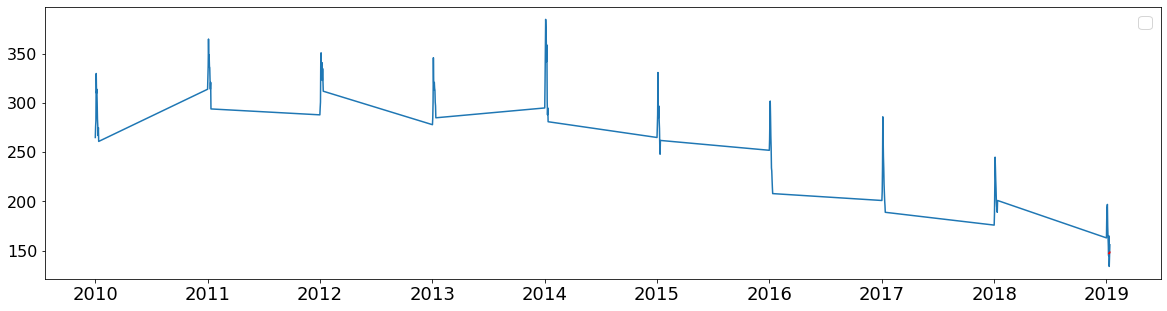

In [18]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Total'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [19]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [11.64260379]


In [20]:
train = df

n_input = 4
n_features = 1

scaler.fit(train)
train = scaler.transform(train)

generator = TimeseriesGenerator(train,train, length=n_input, batch_size=6)

model.fit_generator(generator, epochs=180)

pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:, 1:,:],[[pred_list[i]]], axis = 1)

Epoch 1/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 2/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 3/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 4/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 5/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 6/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0073
Epoch 7/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 8/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 9/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 10/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 11/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 12/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 13/180
20/20 [=================

20/20 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 103/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 104/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 105/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0072
Epoch 106/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 107/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 108/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 109/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 110/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 111/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 112/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 113/180
20/20 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 114/180
20/20 [=========

In [21]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(weeks=x) for x in range(0,5) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
future_dates

,Total
2019-01-19,NaN
2019-01-26,NaN
2019-02-02,NaN
2019-02-09,NaN


In [22]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)
df_proj.index.name = 'Date'


No handles with labels found to put in legend.


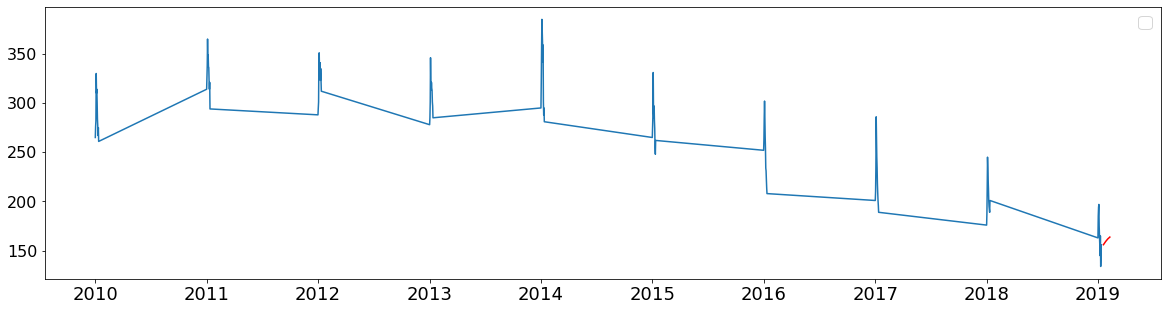

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['Total'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [24]:
print(df_proj)
df_proj.index.name ='Date'
df_proj.reset_index(inplace=True)
print(df_proj)
df_proj['Date'].to_list()

            Total  Prediction
Date                         
2010-01-01  265.0         NaN
2010-01-02  276.0         NaN
2010-01-03  282.0         NaN
2010-01-04  330.0         NaN
2010-01-05  310.0         NaN
2010-01-06  314.0         NaN
2010-01-07  301.0         NaN
2010-01-08  284.0         NaN
2010-01-09  277.0         NaN
2010-01-10  267.0         NaN
2010-01-11  275.0         NaN
2010-01-12  261.0         NaN
2011-01-01  314.0         NaN
2011-01-02  326.0         NaN
2011-01-03  338.0         NaN
2011-01-04  365.0         NaN
2011-01-05  346.0         NaN
2011-01-06  349.0         NaN
2011-01-07  337.0         NaN
2011-01-08  336.0         NaN
2011-01-09  323.0         NaN
2011-01-10  314.0         NaN
2011-01-11  321.0         NaN
2011-01-12  294.0         NaN
2012-01-01  288.0         NaN
2012-01-02  295.0         NaN
2012-01-03  301.0         NaN
2012-01-04  346.0         NaN
2012-01-05  351.0         NaN
2012-01-06  333.0         NaN
...           ...         ...
2017-01-11

[Timestamp('2010-01-01 00:00:00'),
 Timestamp('2010-01-02 00:00:00'),
 Timestamp('2010-01-03 00:00:00'),
 Timestamp('2010-01-04 00:00:00'),
 Timestamp('2010-01-05 00:00:00'),
 Timestamp('2010-01-06 00:00:00'),
 Timestamp('2010-01-07 00:00:00'),
 Timestamp('2010-01-08 00:00:00'),
 Timestamp('2010-01-09 00:00:00'),
 Timestamp('2010-01-10 00:00:00'),
 Timestamp('2010-01-11 00:00:00'),
 Timestamp('2010-01-12 00:00:00'),
 Timestamp('2011-01-01 00:00:00'),
 Timestamp('2011-01-02 00:00:00'),
 Timestamp('2011-01-03 00:00:00'),
 Timestamp('2011-01-04 00:00:00'),
 Timestamp('2011-01-05 00:00:00'),
 Timestamp('2011-01-06 00:00:00'),
 Timestamp('2011-01-07 00:00:00'),
 Timestamp('2011-01-08 00:00:00'),
 Timestamp('2011-01-09 00:00:00'),
 Timestamp('2011-01-10 00:00:00'),
 Timestamp('2011-01-11 00:00:00'),
 Timestamp('2011-01-12 00:00:00'),
 Timestamp('2012-01-01 00:00:00'),
 Timestamp('2012-01-02 00:00:00'),
 Timestamp('2012-01-03 00:00:00'),
 Timestamp('2012-01-04 00:00:00'),
 Timestamp('2012-01-

In [25]:
df_proj['Date']=df_proj['Date'].astype(str)
x= df_proj['Date'].to_list()
x[-14:]

['2019-01-03',
 '2019-01-04',
 '2019-01-05',
 '2019-01-06',
 '2019-01-07',
 '2019-01-08',
 '2019-01-09',
 '2019-01-10',
 '2019-01-11',
 '2019-01-12',
 '2019-01-19',
 '2019-01-26',
 '2019-02-02',
 '2019-02-09']

In [26]:
print(df_predict)

            Prediction
2019-01-19  156.086940
2019-01-26  159.241984
2019-02-02  161.877612
2019-02-09  163.841894


In [27]:
import joblib

joblib.dump(scaler, "data_transformer.joblib")
model.save("model.h5")